In [27]:
# Importa as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import openpyxl
import warnings
warnings.filterwarnings("ignore")

# Variável moderadora qualitativa

In [28]:
# Moderador Qualitativo

# Importação de Dados
base = pd.read_excel("6 - Regressão linear múltipla - Moderação - Dados.xlsx", sheet_name="moderador_quali")
base.sample(10)

,id,vendas,treinamento,graduacao
29,30,835,20,0
8,9,1779,18,1
1,2,1915,26,1
10,11,1451,12,1
16,17,1197,4,1
22,23,930,4,0
12,13,1438,10,1
34,35,879,22,0
14,15,1368,8,1
20,21,851,1,0


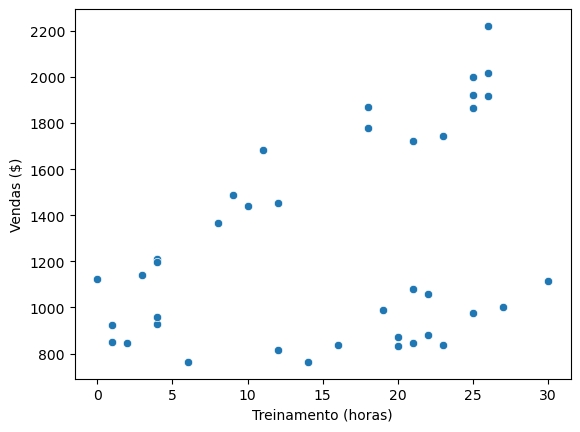

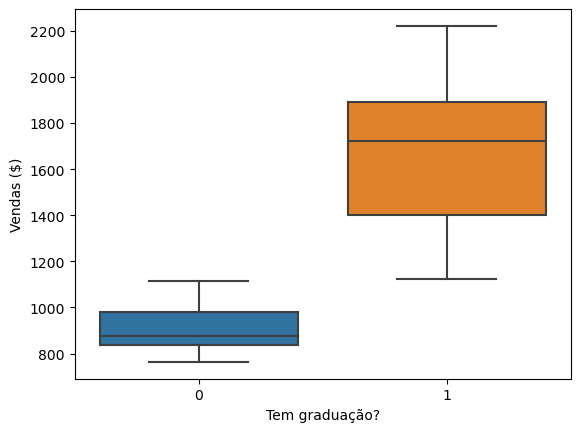

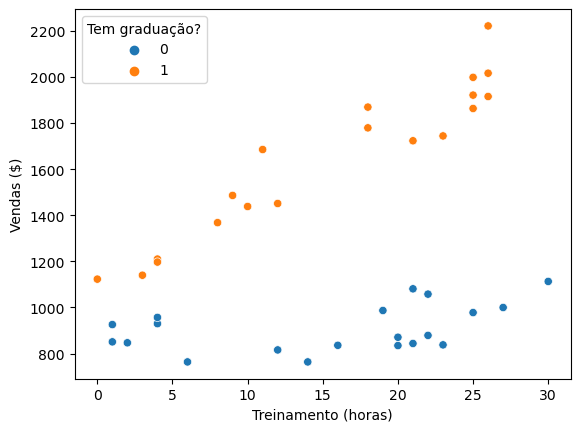

In [5]:
# Estatística descritiva Descritiva

sns.scatterplot(x='treinamento', y='vendas', data=base)
plt.xlabel('Treinamento (horas)')
plt.ylabel('Vendas ($)')
plt.show()

sns.boxplot(x='graduacao', y='vendas', data=base)
plt.xlabel('Tem graduação?')
plt.ylabel('Vendas ($)')
plt.show()

sns.scatterplot(x='treinamento', y='vendas', hue='graduacao', data=base)
plt.xlabel('Treinamento (horas)')
plt.ylabel('Vendas ($)')
plt.legend(title='Tem graduação?')
plt.show()


In [6]:
# Estimar as regressões
modelo1 = ols('vendas ~ treinamento', data=base).fit()
modelo2 = ols('vendas ~ treinamento + graduacao', data=base).fit()
modelo3 = ols('vendas ~ treinamento * graduacao', data=base).fit()


In [8]:
#Output do Modelo 1
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     6.653
Date:                Thu, 06 Nov 2025   Prob (F-statistic):             0.0140
Time:                        00:08:04   Log-Likelihood:                -289.03
No. Observations:                  39   AIC:                             582.1
Df Residuals:                      37   BIC:                             585.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     973.6462    130.616      7.454      

In [9]:
#Output do Modelo 2
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     6.653
Date:                Thu, 06 Nov 2025   Prob (F-statistic):             0.0140
Time:                        00:08:07   Log-Likelihood:                -289.03
No. Observations:                  39   AIC:                             582.1
Df Residuals:                      37   BIC:                             585.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     973.6462    130.616      7.454      

In [10]:
#Output do Modelo 3
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     6.653
Date:                Thu, 06 Nov 2025   Prob (F-statistic):             0.0140
Time:                        00:08:09   Log-Likelihood:                -289.03
No. Observations:                  39   AIC:                             582.1
Df Residuals:                      37   BIC:                             585.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     973.6462    130.616      7.454      

In [12]:
# Resultados das regressões hierárquicas para Vendas

from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
from IPython.display import HTML, display
import pandas as pd

# Modelos
modelo1 = ols('vendas ~ treinamento', data=base).fit()
modelo2 = ols('vendas ~ treinamento + graduacao', data=base).fit()
modelo3 = ols('vendas ~ treinamento * graduacao', data=base).fit()

# Gera a tabela
tabela = summary_col(
    [modelo1, modelo2, modelo3], # Altere os modelos
    stars=True,
    model_names=['(1)', '(2)', '(3)'], # Altere os nomes dos modelos
    info_dict={
        'N': lambda x: f"{int(x.nobs)}",
        'R²': lambda x: f"{x.rsquared:.3f}",
        'R² ajust.': lambda x: f"{x.rsquared_adj:.3f}",
        'F': lambda x: f"{x.fvalue:.2f} (p={x.f_pvalue:.3f})"
    }
)

# Junta tudo (coeficientes + rodapé)
df = pd.concat(tabela.tables)

# 🔧 remove duplicatas do índice antes de ordenar
df = df[~df.index.duplicated(keep='first')]

# Define ordem desejada dos coeficientes estimados no modelo
ordem = ['Intercept', 'treinamento', 'graduacao', 'treinamento:graduacao', 'R²', 'R² ajust.', 'F', 'N']

# Reordena só o que existe
df = df.reindex([i for i in ordem if i in df.index])

# Mostra em HTML
display(HTML(df.to_html(border=0)))

,(1),(2),(3)
Intercept,973.6462***,616.5754***,836.0570***
treinamento,18.7911**,18.8500***,4.6899*
graduacao,,731.0618***,272.8642***
treinamento:graduacao,,,29.5873***
R²,0.152,0.859,0.953
R² ajust.,0.129,0.851,0.949
F,6.65 (p=0.014),109.48 (p=0.000),237.01 (p=0.000)
N,39,39,39


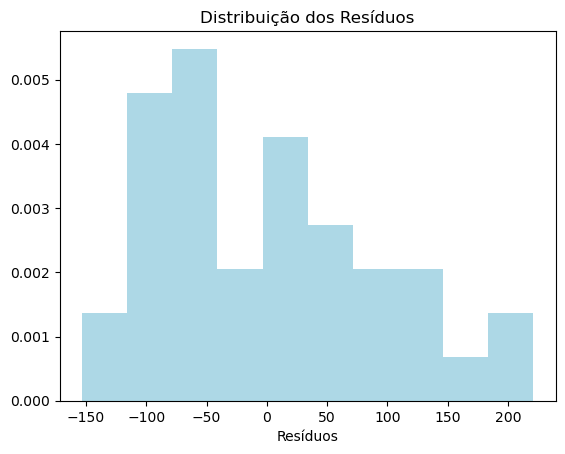

NameError: name 'm3' is not defined

In [13]:
# Premissas do modelo de regressão

# Premissas do Modelo de Regressão
residuals_m3 = modelo3.resid
plt.hist(residuals_m3, color='lightblue', density=True)
plt.xlabel('Resíduos')
plt.title('Distribuição dos Resíduos')
plt.show()

normality_plot, stat = stats.probplot(m3.resid, plot= plt, rvalue= True)

In [14]:
# Teste de normalidade de Shapiro-Wilk

#H0: Os erros (população) seguem uma distribuição normal 
#Estatística do teste W e valor-p, respectivamente

shapiro_test = shapiro(residuals_m3)
shapiro_test

ShapiroResult(statistic=0.9554453143781912, pvalue=0.1254188340489194)

In [15]:
## Teste de Breusch-Pagan 
#H0: A variância dos erros (população) é constante (homoscedasticidade)

from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip

# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value']
 
# Get the test result
test_result = het_breuschpagan(modelo3.resid, modelo3.model.exog)
 # Variável moderadora qualitativa
lzip(names, test_result)

[('Lagrange multiplier statistic', 3.55702602873591),
 ('p-value', 0.313441003230177)]

# Variável moderadora quantitativa

In [16]:
# Moderador Quantitativo

# Importação de Dados
base_quanti = pd.read_excel("6 - Regressão linear múltipla - Moderação - Dados.xlsx", sheet_name="moderador_quanti")
base_quanti.sample(10)

,id,vendas,treinamento,anosestudo
26,27,15750,40,2
88,89,26250,20,9
5,6,5250,30,0
42,43,12250,10,2
110,111,26250,20,14
68,69,17500,10,5
15,16,5250,10,0
63,64,21000,20,5
118,119,24500,10,14
60,61,15750,20,5


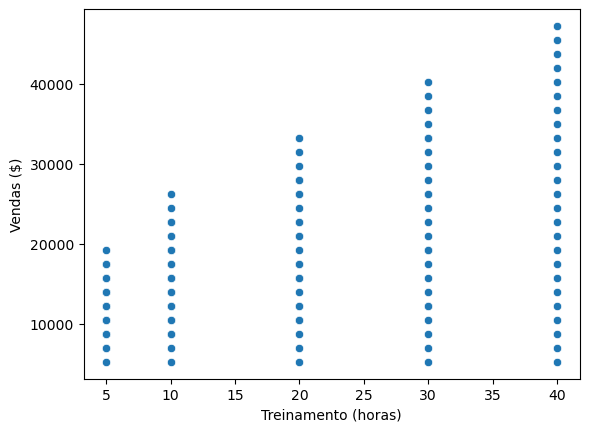

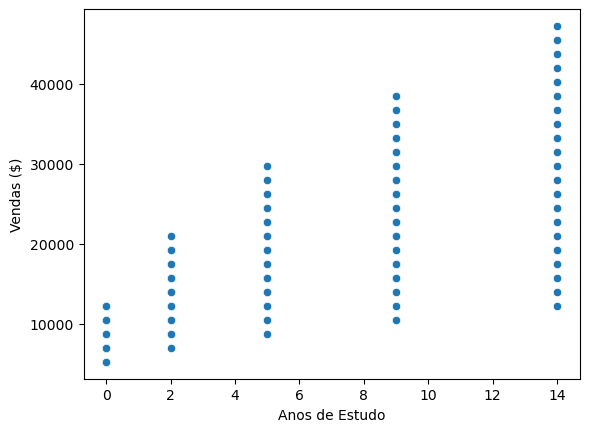

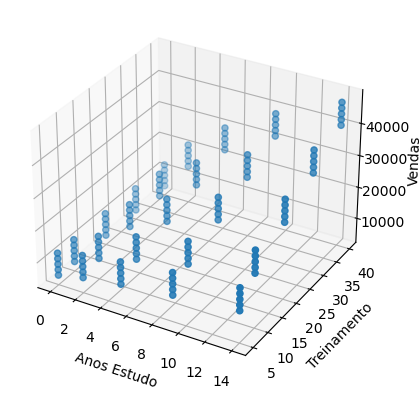

In [17]:
# Análise Descritiva
sns.scatterplot(x='treinamento', y='vendas', data=base_quanti)
plt.xlabel('Treinamento (horas)')
plt.ylabel('Vendas ($)')
plt.show()

sns.scatterplot(x='anosestudo', y='vendas', data=base_quanti)
plt.xlabel('Anos de Estudo')
plt.ylabel('Vendas ($)')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(base_quanti['anosestudo'], base_quanti['treinamento'], base_quanti['vendas'])
ax.set_xlabel('Anos Estudo')
ax.set_ylabel('Treinamento')
ax.set_zlabel('Vendas')
plt.show()

In [18]:
# Matriz de Correlação
correlation_matrix_quanti = base_quanti.corr()
round(correlation_matrix_quanti,4)

,id,vendas,treinamento,anosestudo
id,1.0000,0.6467,-0.1948,0.9661
vendas,0.6467,1.0000,0.4969,0.7395
treinamento,-0.1948,0.4969,1.0000,0.0000
anosestudo,0.9661,0.7395,0.0000,1.0000


In [19]:
# Estimar as regressões
modelo1_quanti = ols('vendas ~ treinamento', data=base_quanti).fit()
modelo2_quanti = ols('vendas ~ treinamento + anosestudo', data=base_quanti).fit()
modelo3_quanti = ols('vendas ~ treinamento * anosestudo', data=base_quanti).fit()

In [20]:
#Output do Modelo 1
print(modelo1_quanti.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     40.34
Date:                Thu, 06 Nov 2025   Prob (F-statistic):           3.75e-09
Time:                        00:08:39   Log-Likelihood:                -1309.7
No. Observations:                 125   AIC:                             2623.
Df Residuals:                     123   BIC:                             2629.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.118e+04   1487.743      7.517      

In [21]:
#Output do Modelo 2
print(modelo2_quanti.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     234.9
Date:                Thu, 06 Nov 2025   Prob (F-statistic):           1.47e-42
Time:                        00:08:41   Log-Likelihood:                -1228.7
No. Observations:                 125   AIC:                             2463.
Df Residuals:                     122   BIC:                             2472.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2432.9268    920.625      2.643      

In [22]:
#Output do Modelo 3
print(modelo3_quanti.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 06 Nov 2025   Prob (F-statistic):           3.18e-64
Time:                        00:08:43   Log-Likelihood:                -1174.2
No. Observations:                 125   AIC:                             2356.
Df Residuals:                     121   BIC:                             2368.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               9155

In [31]:
# Resultados das regressões hierárquicas para Vendas

from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
from IPython.display import HTML, display
import pandas as pd

# Modelos
modelo1_quanti = ols('vendas ~ treinamento', data=base).fit()
modelo2_quanti = ols('vendas ~ treinamento + graduacao', data=base).fit()
modelo3_quanti = ols('vendas ~ treinamento * graduacao', data=base).fit()

# Gera a tabela
tabela = summary_col(
    [modelo1_quanti, modelo2_quanti, modelo3_quanti], # Altere os modelos
    stars=True,
    model_names=['(1)', '(2)', '(3)'], # Altere os nomes dos modelos
    info_dict={
        'N': lambda x: f"{int(x.nobs)}",
        'R²': lambda x: f"{x.rsquared:.3f}",
        'R² ajust.': lambda x: f"{x.rsquared_adj:.3f}",
        'F': lambda x: f"{x.fvalue:.2f} (p={x.f_pvalue:.3f})"
    }
)

# Junta tudo (coeficientes + rodapé)
df = pd.concat(tabela.tables)

# 🔧 remove duplicatas do índice antes de ordenar
df = df[~df.index.duplicated(keep='first')]

# Define ordem desejada dos coeficientes estimados no modelo
ordem = ['Intercept', 'treinamento', 'graduacao', 'treinamento:graduacao', 'R²', 'R² ajust.', 'F', 'N']

# Reordena só o que existe
df = df.reindex([i for i in ordem if i in df.index])

# Mostra em HTML
display(HTML(df.to_html(border=0)))

,(1),(2),(3)
Intercept,973.6462***,616.5754***,836.0570***
treinamento,18.7911**,18.8500***,4.6899*
graduacao,,731.0618***,272.8642***
treinamento:graduacao,,,29.5873***
R²,0.152,0.859,0.953
R² ajust.,0.129,0.851,0.949
F,6.65 (p=0.014),109.48 (p=0.000),237.01 (p=0.000)
N,39,39,39


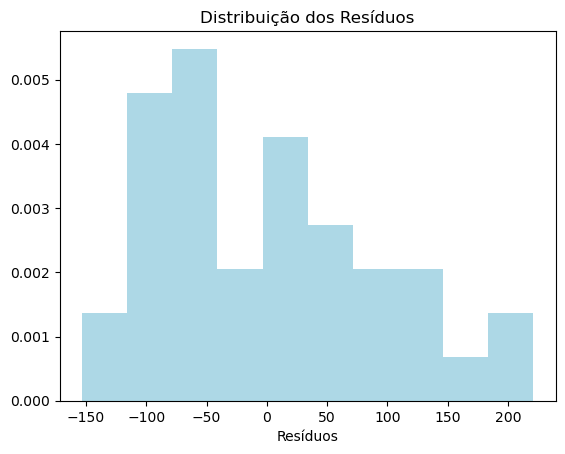

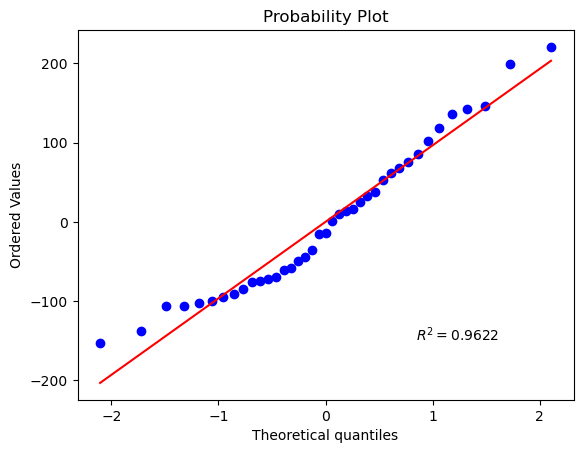

In [34]:
# Premissas do modelo de regressão

# Premissas do Modelo de Regressão
residuals_modelo3_quanti = modelo3_quanti.resid
plt.hist(residuals_m3, color='lightblue', density=True)
plt.xlabel('Resíduos')
plt.title('Distribuição dos Resíduos')
plt.show()

normality_plot, stat = stats.probplot(modelo3_quanti.resid, plot= plt, rvalue= True)

In [36]:
# Teste de normalidade de Shapiro-Wilk

#H0: Os erros (população) seguem uma distribuição normal 
#Estatística do teste W e valor-p, respectivamente

shapiro_test = shapiro(residuals_modelo3_quanti)
shapiro_test

ShapiroResult(statistic=0.9554453143781912, pvalue=0.1254188340489194)

In [37]:
## Teste de Breusch-Pagan 
#H0: A variância dos erros (população) é constante (homoscedasticidade)

# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value']
 
# Get the test result
test_result = het_breuschpagan(modelo3_quanti.resid, modelo3_quanti.model.exog)
 # Variável moderadora qualitativa
lzip(names, test_result)

[('Lagrange multiplier statistic', 3.55702602873591),
 ('p-value', 0.313441003230177)]